### Explorations for Zillow Project


Does the lot size affect the value of the house?
Should I combine bathroom/bedroom count

Counties by FIP:
    6037 - Los Angeles County
    6059 - Orange County
    6111 - Ventura County
    

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import env
import acquire

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = acquire.acquire('zillow')
df.head()

,bathroomcnt,bedroomcnt,yearbuilt,calculatedfinishedsquarefeet,lotsizesquarefeet,parcelid,fips,regionidzip,taxvaluedollarcnt,taxamount
0,2.0,3.0,1923.0,1316.0,5672.0,11721753,6037.0,95997.0,205123.0,2627.48
1,2.0,3.0,1970.0,1458.0,8284.0,11289917,6037.0,97318.0,136104.0,2319.90
2,2.0,3.0,1980.0,1766.0,25082.0,11637029,6037.0,96086.0,810694.0,9407.01
3,1.0,2.0,1911.0,1421.0,6707.0,11705026,6037.0,96018.0,35606.0,543.69
4,3.0,4.0,2003.0,2541.0,4975.0,14269464,6059.0,96958.0,880456.0,9819.72


In [8]:
# Some prep
df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", 
                        "calculatedfinishedsquarefeet":"square_feet", "taxamount": "taxes", 
                        "taxvaluedollarcnt": "tax_value", "parcelid":"parcel_id",
                        "buildingqualitytypeid":"building_quality","regionidcounty":"county",
                        "regionidzip":"zip_code","lotsizesquarefeet":"lot_size", "yearbuilt":"age"})

In [9]:
df.head()

,bathrooms,bedrooms,age,square_feet,lot_size,parcel_id,fips,zip_code,tax_value,taxes
0,2.0,3.0,1923.0,1316.0,5672.0,11721753,6037.0,95997.0,205123.0,2627.48
1,2.0,3.0,1970.0,1458.0,8284.0,11289917,6037.0,97318.0,136104.0,2319.90
2,2.0,3.0,1980.0,1766.0,25082.0,11637029,6037.0,96086.0,810694.0,9407.01
3,1.0,2.0,1911.0,1421.0,6707.0,11705026,6037.0,96018.0,35606.0,543.69
4,3.0,4.0,2003.0,2541.0,4975.0,14269464,6059.0,96958.0,880456.0,9819.72


In [10]:
df.shape

(34363, 10)

In [11]:
df.age = 2017 - df.age
df

,bathrooms,bedrooms,age,square_feet,lot_size,parcel_id,fips,zip_code,tax_value,taxes
0,2.0,3.0,94.0,1316.0,5672.0,11721753,6037.0,95997.0,205123.0,2627.48
1,2.0,3.0,47.0,1458.0,8284.0,11289917,6037.0,97318.0,136104.0,2319.90
2,2.0,3.0,37.0,1766.0,25082.0,11637029,6037.0,96086.0,810694.0,9407.01
3,1.0,2.0,106.0,1421.0,6707.0,11705026,6037.0,96018.0,35606.0,543.69
4,3.0,4.0,14.0,2541.0,4975.0,14269464,6059.0,96958.0,880456.0,9819.72
...,...,...,...,...,...,...,...,...,...,...
34358,3.0,5.0,15.0,3015.0,7207.0,14453399,6059.0,96983.0,852813.0,11662.88
34359,2.0,1.0,53.0,769.0,62464.0,12019061,6037.0,96050.0,492395.0,6023.37
34360,2.0,2.0,48.0,1212.0,45200.0,11570288,6037.0,96030.0,600608.0,7255.87
34361,3.0,5.0,40.0,2992.0,40567.0,11128688,6037.0,96356.0,1120000.0,13663.03


In [12]:
df.set_index('parcel_id')

,bathrooms,bedrooms,age,square_feet,lot_size,fips,zip_code,tax_value,taxes
parcel_id,,,,,,,,,
11721753,2.0,3.0,94.0,1316.0,5672.0,6037.0,95997.0,205123.0,2627.48
11289917,2.0,3.0,47.0,1458.0,8284.0,6037.0,97318.0,136104.0,2319.90
11637029,2.0,3.0,37.0,1766.0,25082.0,6037.0,96086.0,810694.0,9407.01
11705026,1.0,2.0,106.0,1421.0,6707.0,6037.0,96018.0,35606.0,543.69
14269464,3.0,4.0,14.0,2541.0,4975.0,6059.0,96958.0,880456.0,9819.72
...,...,...,...,...,...,...,...,...,...
14453399,3.0,5.0,15.0,3015.0,7207.0,6059.0,96983.0,852813.0,11662.88
12019061,2.0,1.0,53.0,769.0,62464.0,6037.0,96050.0,492395.0,6023.37
11570288,2.0,2.0,48.0,1212.0,45200.0,6037.0,96030.0,600608.0,7255.87


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34363 entries, 0 to 34362
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    34363 non-null  float64
 1   bedrooms     34363 non-null  float64
 2   age          34363 non-null  float64
 3   square_feet  34363 non-null  float64
 4   lot_size     34363 non-null  float64
 5   parcel_id    34363 non-null  int64  
 6   fips         34363 non-null  float64
 7   zip_code     34363 non-null  float64
 8   tax_value    34363 non-null  float64
 9   taxes        34363 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.6 MB


In [14]:
df.value_counts('age')

age
62.0     1016
67.0      878
53.0      825
64.0      795
63.0      783
         ... 
125.0       1
129.0       1
132.0       1
135.0       1
1.0         1
Length: 131, dtype: int64

In [15]:
df.value_counts('square_feet')

square_feet
1120.0    84
1200.0    79
1080.0    64
864.0     61
1040.0    59
          ..
4140.0     1
4142.0     1
4147.0     1
4148.0     1
242.0      1
Length: 4144, dtype: int64

In [16]:
df.value_counts('bathrooms')

bathrooms
2.0     14390
3.0      8442
1.0      5749
2.5      2203
4.0      1327
3.5       541
5.0       470
1.5       446
4.5       381
6.0       176
5.5       111
7.0        54
8.0        30
6.5        27
7.5         9
9.0         4
11.0        2
10.0        1
dtype: int64

In [17]:
df.value_counts('lot_size')

lot_size
6000.0     475
5000.0     231
7200.0     183
7000.0     159
6500.0     149
          ... 
14720.0      1
14717.0      1
14714.0      1
14711.0      1
236.0        1
Length: 13544, dtype: int64

In [30]:
# df.sort_values(by = 'square_feet', ascending = False)

nulls=df.isnull()
nulls

nulls.value_counts("taxes")

taxes
False    34363
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34363 entries, 0 to 34362
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    34363 non-null  float64
 1   bedrooms     34363 non-null  float64
 2   age          34363 non-null  float64
 3   square_feet  34363 non-null  float64
 4   lot_size     34363 non-null  float64
 5   parcel_id    34363 non-null  int64  
 6   fips         34363 non-null  float64
 7   zip_code     34363 non-null  float64
 8   tax_value    34363 non-null  float64
 9   taxes        34363 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.6 MB


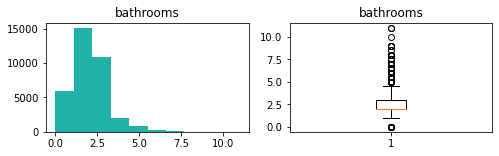

count    35277.000000
mean         2.323709
std          0.979712
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: bathrooms, dtype: float64


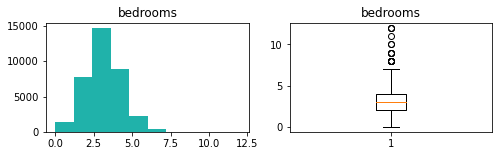

count    35277.000000
mean         3.111999
std          1.013998
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: bedrooms, dtype: float64


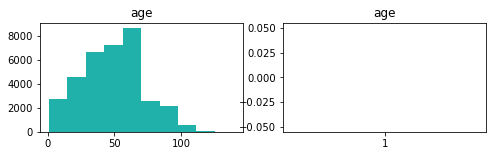

count    35194.000000
mean        49.123828
std         23.137764
min          1.000000
25%         31.000000
50%         50.000000
75%         64.000000
max        139.000000
Name: age, dtype: float64


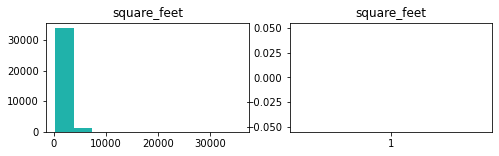

count    35217.000000
mean      1830.036233
std        973.184108
min        240.000000
25%       1217.000000
50%       1582.000000
75%       2175.000000
max      35640.000000
Name: square_feet, dtype: float64


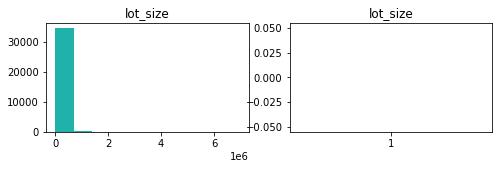

count    3.461400e+04
mean     3.022767e+04
std      1.121878e+05
min      2.360000e+02
25%      5.842000e+03
50%      7.332500e+03
75%      1.232375e+04
max      6.971010e+06
Name: lot_size, dtype: float64


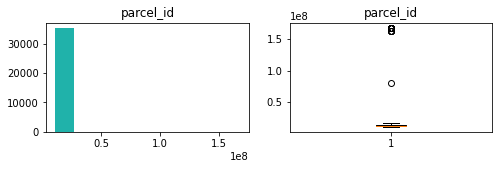

count    3.527700e+04
mean     1.281312e+07
std      3.781330e+06
min      1.071186e+07
25%      1.143254e+07
50%      1.239349e+07
75%      1.398154e+07
max      1.676878e+08
Name: parcel_id, dtype: float64


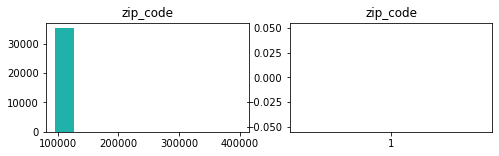

count     35255.000000
mean      96579.834860
std        4584.184545
min       95982.000000
25%       96192.000000
50%       96377.000000
75%       96978.000000
max      399675.000000
Name: zip_code, dtype: float64


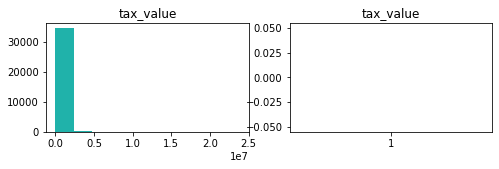

count    3.527600e+04
mean     5.110853e+05
std      6.523098e+05
min      1.000000e+03
25%      2.067780e+05
50%      3.707255e+05
75%      6.010000e+05
max      2.385837e+07
Name: tax_value, dtype: float64


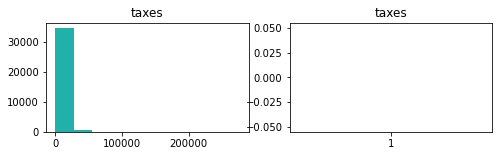

count     35276.000000
mean       6242.947423
std        7585.765700
min          51.260000
25%        2753.922500
50%        4616.890000
75%        7230.452500
max      276797.830000
Name: taxes, dtype: float64


In [48]:
# def plot_cat_by_target(train, target, cat_var):
#     p = plt.figure(figsize=(8,8))
#     p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
#     overall_rate = train[target].mean()
#     p = plt.axhline(overall_rate, ls='--', color='gray')
#     return p 

# plot_cat_by_target(df, df.tax_value, df.bedrooms)
cat_vars = []
quant_vars = ['bathrooms', 'bedrooms', 'age', 'square_feet', 'lot_size', 'parcel_id', 'zip_code', 'tax_value', 'taxes']
def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats

def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)
        
explore_univariate(df, cat_vars, quant_vars)

In [31]:
# Takeaways:
# #     
# Change to int: bathrooms, bedrooms, zip_code
    
# Bathrooms - remove 13, with value of 0
# Bedrooms - remove 68, with value of 0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34363 entries, 0 to 34362
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    34363 non-null  float64
 1   bedrooms     34363 non-null  float64
 2   age          34363 non-null  float64
 3   square_feet  34363 non-null  float64
 4   lot_size     34363 non-null  float64
 5   parcel_id    34363 non-null  int64  
 6   fips         34363 non-null  float64
 7   zip_code     34363 non-null  float64
 8   tax_value    34363 non-null  float64
 9   taxes        34363 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.6 MB


In [37]:
# Change datatypes
df.bedrooms = df.bedrooms.astype('int64')
df.age = df.age.astype('int64')
df.square_feet = df.square_feet.astype('int64')
df.lot_size = df.lot_size.astype('int64')
df.fips = df.fips.astype('int64')
df.zip_code = df.zip_code.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34363 entries, 0 to 34362
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    34363 non-null  float64
 1   bedrooms     34363 non-null  int64  
 2   age          34363 non-null  int64  
 3   square_feet  34363 non-null  int64  
 4   lot_size     34363 non-null  int64  
 5   parcel_id    34363 non-null  int64  
 6   fips         34363 non-null  int64  
 7   zip_code     34363 non-null  int64  
 8   tax_value    34363 non-null  float64
 9   taxes        34363 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 2.6 MB
